Measurement Results: {'11': 1024}


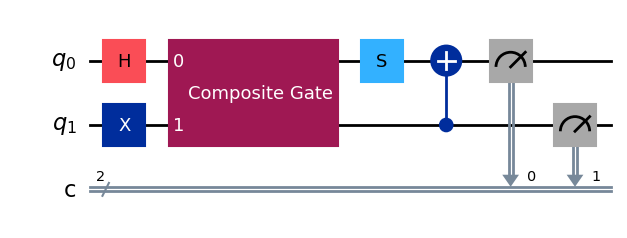

In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

def create_composite_gate():
    qc_composite = QuantumCircuit(2, name="Composite Gate")
    
    qc_composite.h(0)
    qc_composite.cx(0, 1)
    qc_composite.z(1)
    
    composite_gate = qc_composite.to_instruction()
    
    return composite_gate

def create_main_circuit():
    qc_main = QuantumCircuit(2, 2)

    composite_gate = create_composite_gate()

    qc_main.h(0)
    qc_main.x(1)

    qc_main.append(composite_gate, [0, 1])

    qc_main.s(0)
    qc_main.cx(1, 0)

    return qc_main

def add_measurement(circuit):
    circuit.measure([0, 1], [0, 1])

def simulate_circuit(circuit):
    simulator = AerSimulator()
    compiled_circuit = transpile(circuit, simulator)
    result = simulator.run(compiled_circuit).result()
    counts = result.get_counts(compiled_circuit)
    return counts

def main():
    main_circuit = create_main_circuit()
    add_measurement(main_circuit)

    results = simulate_circuit(main_circuit)

    print("Measurement Results:", results)

    display(main_circuit.draw('mpl'))

main()


In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

In [3]:
def take_input():
    n = 0
    while True:
        try:
            n = int(input('Enter the number of qubits: '))
        except ValueError:
            print('Enter valid natural number as number of gates!!')
            continue
        else:
            break
    print(f'n = {n}')
    return n

In [4]:
def ranged_input(n, input_string='', lower_limit=0):
    while True:
        inp = int(input(input_string))
        if inp < lower_limit or inp >= n:
            print(f'Please enter a whole number less than {n}')
            continue
    
        return inp

In [5]:
def create_circuit():
    n = take_input()
    
    qc = QuantumCircuit(n)
    gates = ['X', 'H', 'CX', 'CY', 'I', 'DONE']
    
    while True:
        gate = input('Enter the type of gate (Enter "done" when finished giving inputs): ').upper()
        if gate not in gates:
            print(f'Please enter a valid gate (Possible values: {gates[:-1]}): ')
            continue
        
        if gate == 'X' or gate == 'I' or gate == 'H':
            input_string = f'Enter qubit to apply {gate}-gate: '
            qubit = ranged_input(n, input_string=input_string)
            if gate == 'X':
                qc.x(qubit)
            elif gate == 'I':
                qc.id(qubit)
            else:
                qc.h(qubit)
               
        elif gate == 'CX' or gate == 'CY':
            control = int(input('Enter control qubit: '))
            target = int(input('Enter target qubit: '))
            
            if gate == 'CX':
                qc.cx(control, target)
            else:
                qc.cy(control, target)
        
        else:
            break
    
    return qc

In [6]:
qc = create_circuit()

n = 2


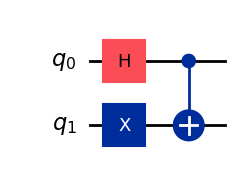

In [7]:
qc.draw('mpl')

In [3]:
def composite_gate(n):
    aux = QuantumCircuit(n, name='AUX')
    gates = ['CX', 'H', 'I', 'X', 'CY']
    gates_order = []
    
    while True:
        gate = input('Enter the type of gate (Enter "done" when finished giving inputs): ').upper()
        if gate == 'done':
            break
        
        if gate not in gates:
            print(f'Please enter a valid gate (Possible values: {gates}): ')
            continue
                
        if gate == 'X' or gate == 'I' or gate == 'H':
            input_string = f'Enter qubit to apply {gate}-gate: '
            qubit = ranged_input(n, input_string=input_string)
            if gate == 'X':
                gates_order.append(['X', qubit])
                aux.x(qubit)
            elif gate == 'I':
                gates_order.append(['I', qubit])
                aux.id(qubit)
            else:
                gates_order.append(['H', qubit])
                aux.h(qubit)
               
        elif gate == 'CX' or gate == 'CY':
            control = int(input('Enter control qubit: '))
            target = int(input('Enter target qubit: '))
            
            if gate == 'CX':
                gates_order.append(['cx', control, target])
                aux.cx(control, target)
            else:
                gates_order.append(['cy', control, target])
                aux.cy(control, target)
    
    res = QuantumCircuit(n, name='RES')
    
    for item in gates_order[::-1]:
        gate = item[0]
        
        if gate == 'X':
            qubit = item[1]
            res.x(qubit)
        
        elif gate == 'H':
            qubit = item[1]
            res.h(qubit)
        
        elif gate == 'I':
            qubit = item[1]
            res.id(qubit)
        
        elif gate == 'CX':
            control = item[1]
            target = item[2]
            res.cx(control, target)
        
        elif gate == 'CY':
            control = item[1]
            target = item[2]
            res.cy(control, target)
    
    return aux.to_gate(), res.to_gate()

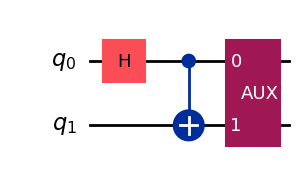

In [8]:
new_gate = composite_gate()
qc.append(new_gate, [0, 1])
qc.draw('mpl')